# Naive Bayes' Algorithm

Naive Bayes(NB) classifier is a probabilistic machine learning model based on Baye's theorem. It is a very popular supervised learning algorithm used for problems like text classification, spam filtering, and recommendation systems. It belongs to the family of generative learning algorithms, which means that it models the distribution of the inputs for a given class or category.

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. 

It is called Naive Bayes because it makes a naive assumption features being independent,i.e,the features of the input data are conditionally independent given the class. This means we can calculate the likelihood of each feature separately. In simple terms NB assumes that presence of one feature is unrelated to the presence of another feature. 

Coming down to the basics - Bayes' theorem is based on the probability of hypothesis, given the data and some prior knowledge. 

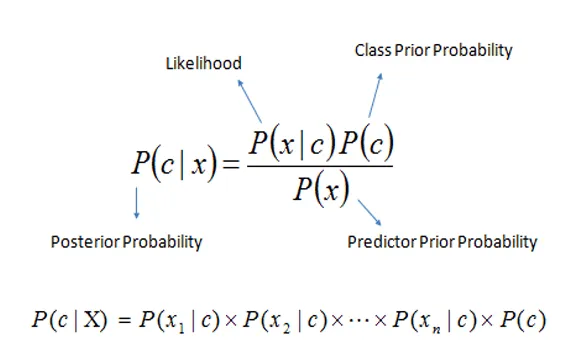

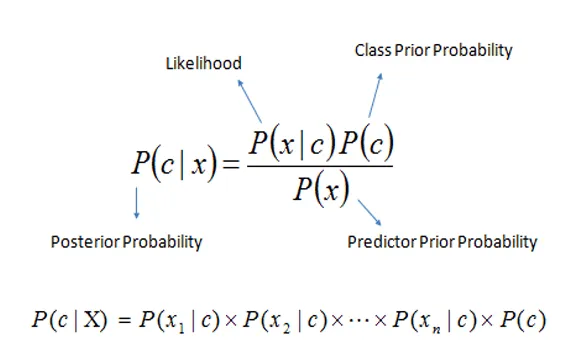

Bayes' theorem computes below:
P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
P(c) is the prior probability of class.
P(x|c) is the likelihood which is the probability of the predictor given class.
P(x) is the prior probability of the predictor.

There are five types of NB models under the scikit-learn library:

1. Gaussian Naive Bayes: GaussianNB is used in classification tasks and it assumes that feature values follow a gaussian distribution.
2. Multinomial Naive Bayes: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.
3. Bernoulli Naive Bayes: The binomial model is useful if your feature vectors are boolean (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.
4. Complement Naive Bayes: It is an adaptation of Multinomial NB where the complement of each class is used to calculate the model weights. So, this is suitable for imbalanced data sets and often outperforms the MNB on text classification tasks.
5. Categorical Naive Bayes: Categorical Naive Bayes is useful if the features are categorically distributed. We have to encode the categorical variable in the numeric format using the ordinal encoder for using this algorithm.

This section will focus on an intuitive explanation of how naive Bayes classifiers work, using social network ads dataset downloaded from Kaggle. We will be using GaussianNB


# Implementation of Naive Bayes Classifier

### Dataset Used - We will be using the social network ads data from Kaggle. This dataset consist of the Gender, Age, and Estimated Salary of several users 
### Problem Statement - Based on the given dataset classify each user whether they would purchase the insurance or not.

## Step 1 - Import libraries

In [46]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Step2 - Import data
Please download the data set from [Kaggle](https://www.kaggle.com/datasets/rakeshrau/social-network-ads) and upload it to the folder containing your notebook and then read it as pandas dataframe

In [47]:
##Read dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Step3 - Exploratory Data Analysis
Exploratory Data Analysis(EDA) is a very important step in understanding the data. It is the process of analysing and summarizing the main characteristics of a dataset. EDA helps in understanding the underlying patterns, trends in a given dataset. EDA also covers visualisation of the data using different forms of plots, charts and graphs.

EDA is done using following steps:
1. Data Cleaning & Preparation - This step involves, treating missing values, tranforming variables(normalisation, standardisation etc.), handling outliers in dataset
2. Data Visualisation - This steps involves representation of data in terms of plots, charts and graphs, to visualise any underlying patterns and trends
3. Statistical Analysis - This steps involves finding sufficient statistics using statistical methods to identify useful features and relationship among variables in a dataset

EDA helps in understanding the biases/errors in data if any which could impact the final results

### Remove columns which are not required (if any)
In the Kaggle data we are using, there are five columns and we don't need UserID column for the problem at hand so we will drop it

In [48]:
##Remove UserID column
dataset.drop(columns = ['User ID'], inplace = True) 
###When you use inplace=False the new object is created and changed instead of the original data frame. 
#####If you wanted to update the original data frame to reflect the dropped
####rows you would have to reassign the result to the original data frame as shown in the code below.

#### inplace = True does not create an intermediary object that is then reassigned to the original variable. 
####It changes the original data frame directly, therefore, preferred if your intention is to change the 
###original data frame.
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Data description

We will use pandas describe() function to get the descriptive statistics of the data like count, mean, standard deviation, quantiles and range of data etc.

In [49]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Checking the Data distribution
We will check the distribution of different variables 

/var/folders/4s/ntykpnq96qn0xq909m03l6jm0000gn/T/ipykernel_56508/745893353.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

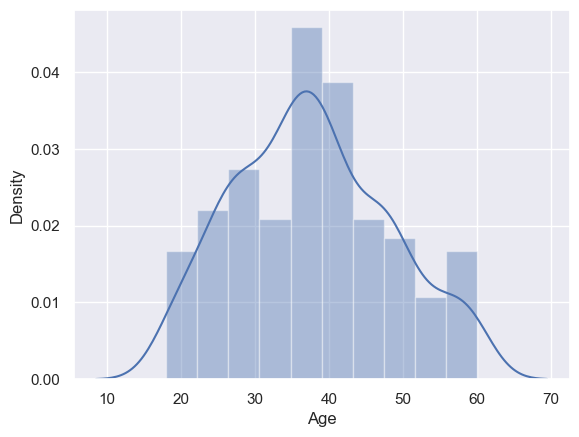

In [50]:
###Age distribution
sns.distplot(dataset['Age'])

/var/folders/4s/ntykpnq96qn0xq909m03l6jm0000gn/T/ipykernel_56508/89697789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

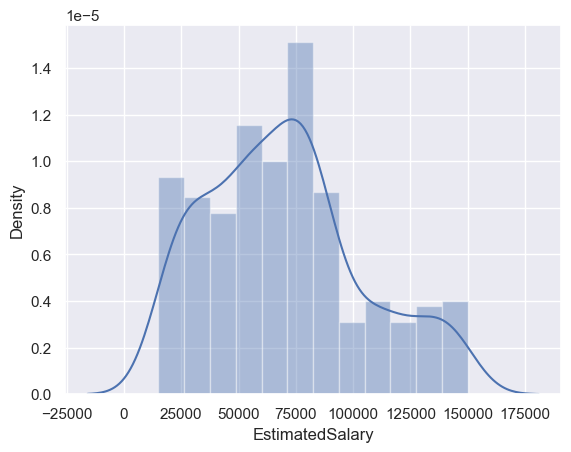

In [51]:
sns.distplot(dataset['EstimatedSalary'])

### Label Encoding

Label encoding is a preprocessing method in machine learning and data analysis where categorical variables in a dataset are converted to numerical values, for easy and compatible mathematical operations.

The categorical variable is assigned an integer value, typically starting from 0 and each unique category in the variable is assigned unique integer.
In our dataset we have one categorical variable which is Gender so we will do label encoding on Gender.

Although we will not be using this variable in our model as this variable can lead to ethical bias (Gender bias) but for the purpose of EDA we will perform a few operations on this variable for illustration before dropping it

In [52]:
# Label encoding
labelEncoding = LabelEncoder()
dataset['Gender']= labelEncoding.fit_transform(dataset['Gender'])

dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


### Correlation Matrix

A correlation matrix is a statistical method used to evaluate the relationship between variables in a dataset. It shows the correlation coefficients between each pair of variables, which indicate the strength and direction of the relationship between the variables. It is useful for identifying highly correlated variables and selecting a subset of variables for further analysis.

* Range of Correlation coefficient (-1,1)

1. A correlation coefficient of -1 indicates a strong negative relationship between two variables
2. A correlation coefficient of 0 indicates no relationship between two variables
3. A correlation coefficient of 1 indicates a strong positive relationship between two variables

In [53]:
## Correlation Matrix

dataset.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

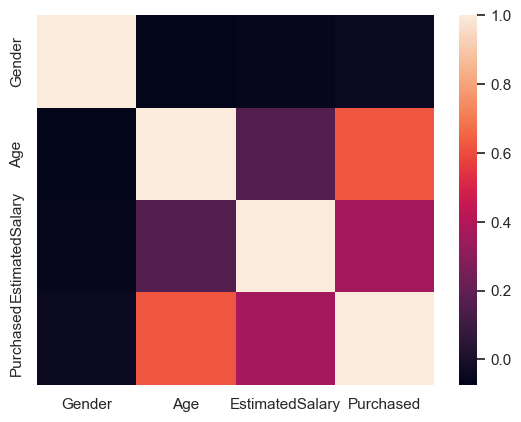

In [54]:
#### Plotting a heatmap,  
### brighter colors are used to represent larger values, while cooler or darker colors represent smaller values.
sns.heatmap(dataset.corr())

In [55]:
### From correlation matrix and heatmap we can see that Gender is not correlated to other variables.
### Furthermore now we will drop Gender as a variable as well to have an ethical classification model

#### Drop Gender
dataset.drop(columns = ['Gender'], inplace = True)

dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Step4 - Splitting the dataset

First we split the data into dependent(y) and independent(X) variables. Independent variables are the features which we will use to predict dependent variable also called as target variables.

Post this the data will also undergo test/train split.

### y/X variables

In our data Purchased is dependent/target variable (y) and Age and EstimatedSalary are independent variables (Xs)

In [56]:
### Splitting the dataset into X and y

X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,-1].values

### train/test split

The training set is used to train the model and find the optimal parameters. The model is then tested on the test set to evaluate its performance and determine its accuracy. This is important because if the model is trained and tested on the same data, it may over-fit the data and perform poorly on new, unseen data.

We have split the data into 75% for training and 25% for testing.

In [57]:
### Split data into test/train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

## Feature Scaling

Feature scaling is a method in machine learning to scale the input variables as ML algorithms are sensitive to the scale of input variables.

The two common methods of feature scaling are normalization and standardization

1. Normalization is scaling the values of the variables between 0 and 1. This is achieved by subtracting the minimum value of the variable and then dividing it by the range

2. Standardization is the tranformation of the variable resulting in mean 0 and standard deviation 1. This is done by subtracting the mean and dividing by standard deviation

Feature scaling helps in improving the performance of the model and reduce the time required to train it, and helps to ensure that the algorithm is not biased towards variables with larger values.

In [63]:
## Scale dataset

scaleDataset = StandardScaler()
X_train = scaleDataset.fit_transform(X_train)
X_test = scaleDataset.transform(X_test)

## Step6 - Train Model

Training a ML model is done using the training dataset to estimate model parameters. This process is iterative in nature and keeps updating the parameters, minimizing the loss function( difference between predicted and estimated value of y) until it reaches an optimum value.

We will now pass the X_train and y_train data into the Naïve Bayes classifier model using the classifier.fit function to train the model with our training data.

Here we are using the Gaussian Naive Bayes as our features seen above are following Gaussian distribution

In [65]:
# Model classifier
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

## Step7 - Prediction

Once the likelihood of the features for each class is calculated, the algorithm multiplies the likelihood by the prior probability of each class, which is estimated from the training data. The class with the highest probability is then selected as the predicted class.

The accuracy of the model can be evaluated on a test set, which was previously held out from the training process.

In [67]:
## Prediction

y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


## Step8 - Model Evaluation

Here we will see confusion matrix, precision, recall, F1-score, and ROC-AUC, and accuracy, to get a holistic picture of the performance of a model.

### Accuracy

Accuracy is the proportion of correct prediction of a model on a given dataset. We are doing binary classification where accuracy is number of correct predictions divided by the total number of predictions.
Accuracy is a commonly used matrix but can be misleading. For instance, if the data is imbalanced a model that always predicts the majority class will have high accuracy, even though it may not be performing well.

In [69]:
## Accuracy

accuracy_score(y_test,y_pred)

0.86

### Classification Report

A classification report is a summary of several metrics used for evaluating the performance of the model on a classification task, including precision, recall, f1-score, and support.


In [70]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.83      0.83      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



If you see in the above table, weighted average of the individual class scores are also provided, which takes into account the imbalance in the distribution of classes in the dataset.

### Confusion matrix

A confusion matrix summarizes the model’s performance by comparing the actual class labels of the data to the predicted class labels generated by the model.

True Positives (TP): Correctly predicted positive instances.
False Positives (FP): Incorrectly predicted positive instances.
True Negatives (TN): Correctly predicted negative instances.
False Negatives (FN): Incorrectly predicted negative instances.

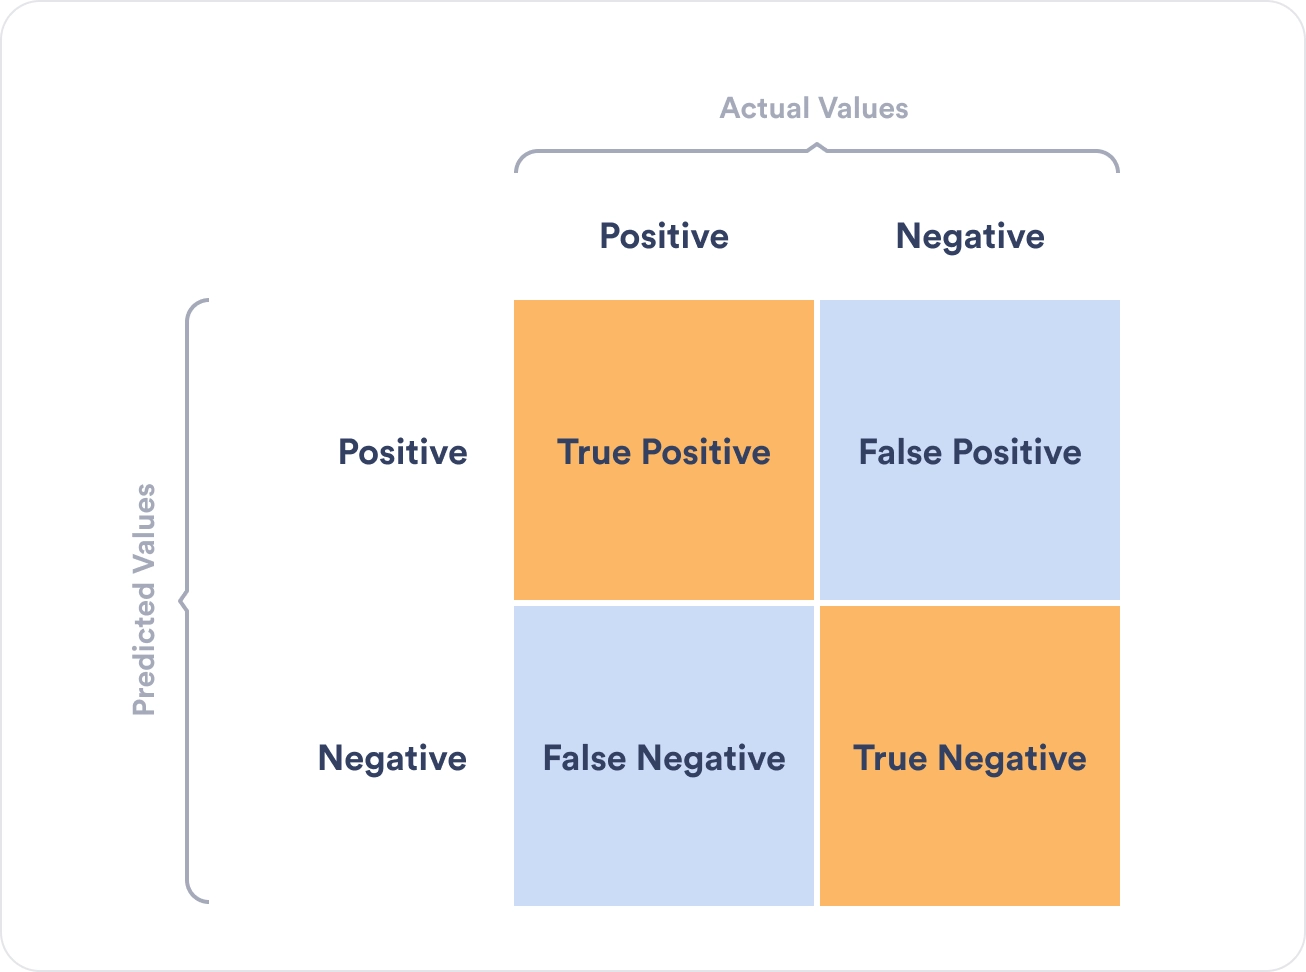

<Axes: >

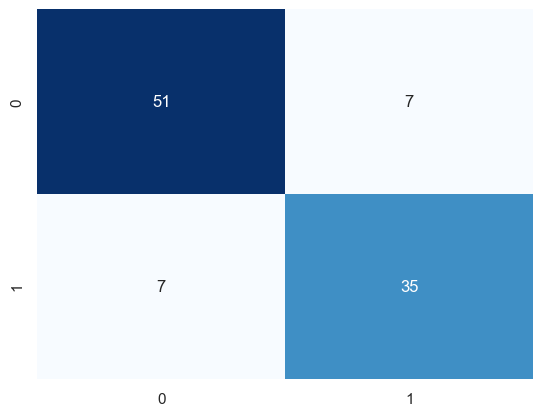

In [71]:
# Confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', cbar=False)

### Precision and Recall


Precision measures the accuracy of the positive predictions made by the model.

Recall measures the ability of the model to find all positive instances.

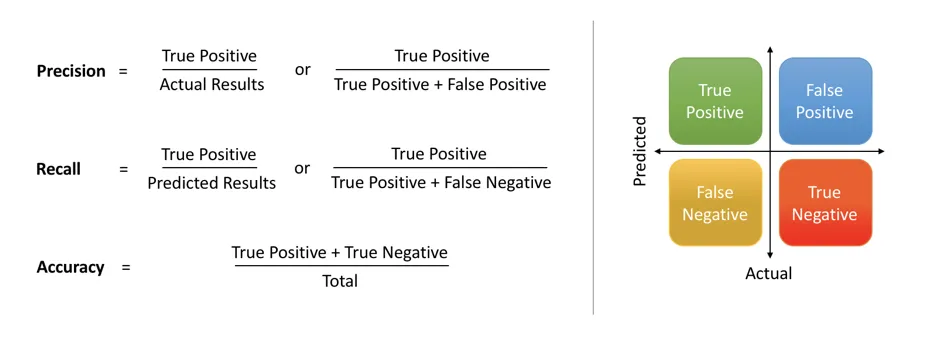

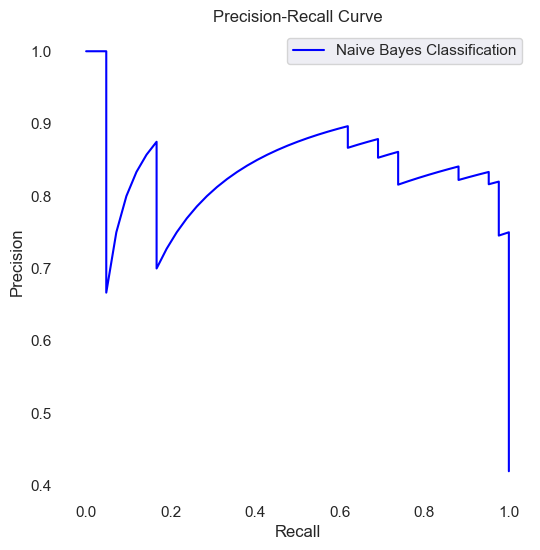

In [74]:
# Plot Precision-Recall curve

yPredictProba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, yPredictProba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Naive Bayes Classification', color = 'blue')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

### AUC/ROC Curve

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC).

A ROC curve plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different thresholds of the model’s prediction probabilities. The TPR is the number of true positive predictions divided by the number of actual positive instances, while the FPR is the number of false positive predictions divided by the number of actual negative instances.

The AUC is the area under the ROC curve and provides a single-number metric that summarizes the performance of the model over the entire range of possible thresholds.

A high AUC indicates that the model is able to distinguish positive instances from negative instances well.

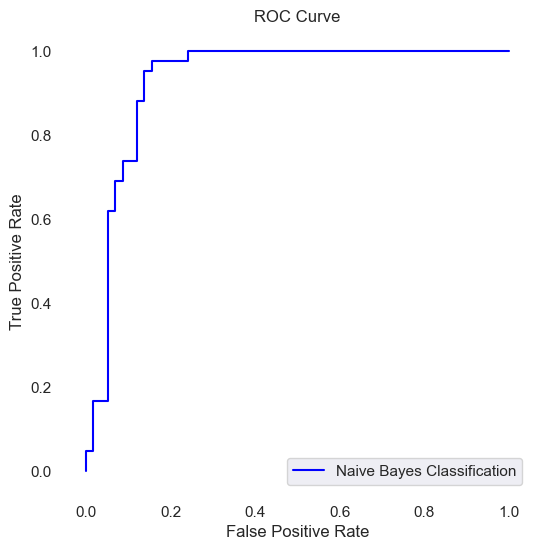

In [75]:
# Plot AUC/ROC curve
yPredictProba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  yPredictProba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'blue')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### F1 score

F1-score is the harmonic mean of precision and recall. The F1-score of a classifier which always predicts the positive class converges to 1 as the probability of the positive class increases.


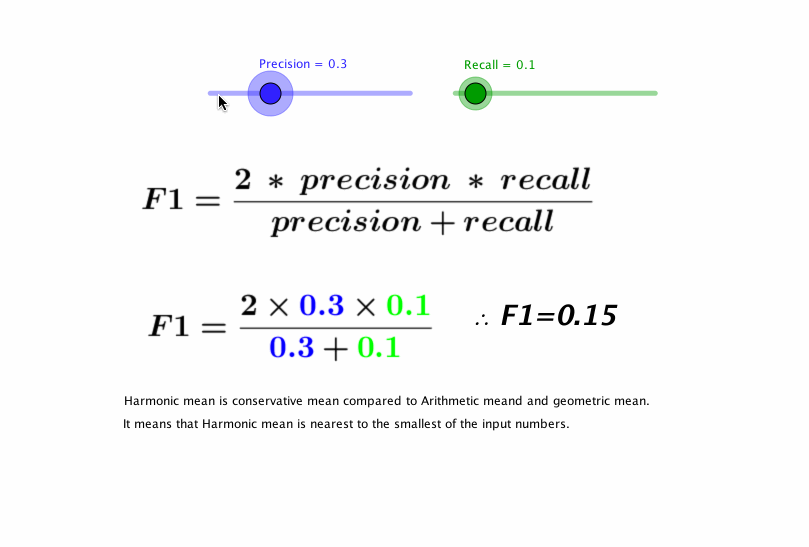

In [76]:
## F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8333333333333334


### Let's test by an example

Let’s see with an example of an Age of 30 and a Salary of 100,000 and check if the user is likely to purchase the insurance or not.

In [91]:
# Predict purchase with Age(30) and Salary(100,000)
print(classifier.predict(scaleDataset.transform([[30, 100000]])))

[1]
